In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib import colors
from matplotlib import rcParams

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':.8,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

In [17]:
def pix2world(shape,delta,origin_pix,origin_world):
    '''
    convert pixel coordinate to
    ra,dec, origin_pix and origin_world
    is the coordinate of origin in 
    different frame. They are both 1-d
    array with two elements
    return two 1-d arrays of ra and 
    dec respectively
    '''
    
    x,y=np.arange(shape[0]),np.arange(shape[1])
    X,Y=np.meshgrid(x,y)
    ra_map=(X-origin_pix[0])*delta[0]+origin_world[0]
    dec_map=(Y-origin_pix[1])*delta[1]+origin_world[1]
    return ra_map.mean(axis=0), dec_map.mean(axis=1)
    
#     return ra_map.mean(axis=0),dec_map.mean(axis=0)

In [18]:
#read H-alpha image
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/results/'
fitsfile=fits.open(dic+'MORICS_MAMMOTH1_sub.fits')
h_alpha=fitsfile[0].data

In [30]:
# convert pixel coordinate to delta_ra,delta_dec
refer_world=[220.3520857,40.05267301]
refer_pix=[200,148]
delta=[2.940135781e-05,3.221502402e-05]
ra,dec=pix2world(h_alpha.shape,delta, refer_pix,refer_world)
delta_ra=(ra-refer_world[0])*u.deg.to(u.arcsec).value
delta_dec=(dec-refer_world[1])*u.deg.to(u.arcsec).value

In [36]:
h_alpha.shape

(351, 301)

In [37]:
h_alpha.T.shape

(301, 351)

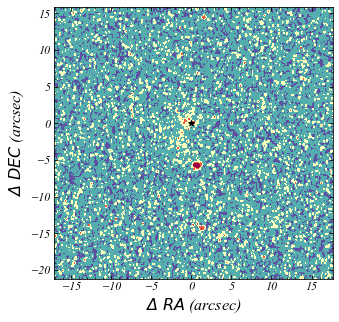

In [45]:
# plot the image
fig_dir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
h_alpha_norm=colors.Normalize(vmax=0.15,vmin=0)
dec_map,ra_map=np.meshgrid(delta_dec,delta_ra)
fig,ax=plt.subplots(1,1)
ax.contourf(dec_map.T,ra_map.T,h_alpha.T,cmap='Spectral_r',
            norm=h_alpha_norm)
ax.scatter(0,0,marker='*',color='black')
ax.set_xlabel(r'$\rm \Delta \ RA$ (arcsec)')
ax.set_ylabel(r'$\rm \Delta \ DEC$ (arcsec)')
plt.rcParams['figure.figsize'] = [5.,5.]
plt.savefig(fig_dir+'H_alpha.png',dpi=300)
# plt.show()